In [10]:
import pandas as pd
import seaborn as sns

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [39]:
# Preparing model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [40]:
y = campaign["y"].map({"yes": 1, "no": 0})

# Encode our features and target as needed
features = ["age", "job", "marital", "education", "campaign", "previous", "poutcome"]

numeric_features = ["age", "campaign", "previous"]

categorical_features = ["job", "marital", "education", "poutcome"]

X = pd.get_dummies(campaign[categorical_features], drop_first=True)

X[numeric_features]= campaign[numeric_features]
y = campaign['y']

# Split our data into training and test data, with 20% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Build the decision tree
clf = DecisionTreeClassifier()

# Train it
clf.fit(X_train, y_train)

# Test it
clf.score(X_test, y_test)

# Note that this gives us an accuracy score, which may not be the best metric.
# See the SciKit-Learn docs for more ways to assess a model's performance, as
# well as methods for cross validation.

0.8656595629889399

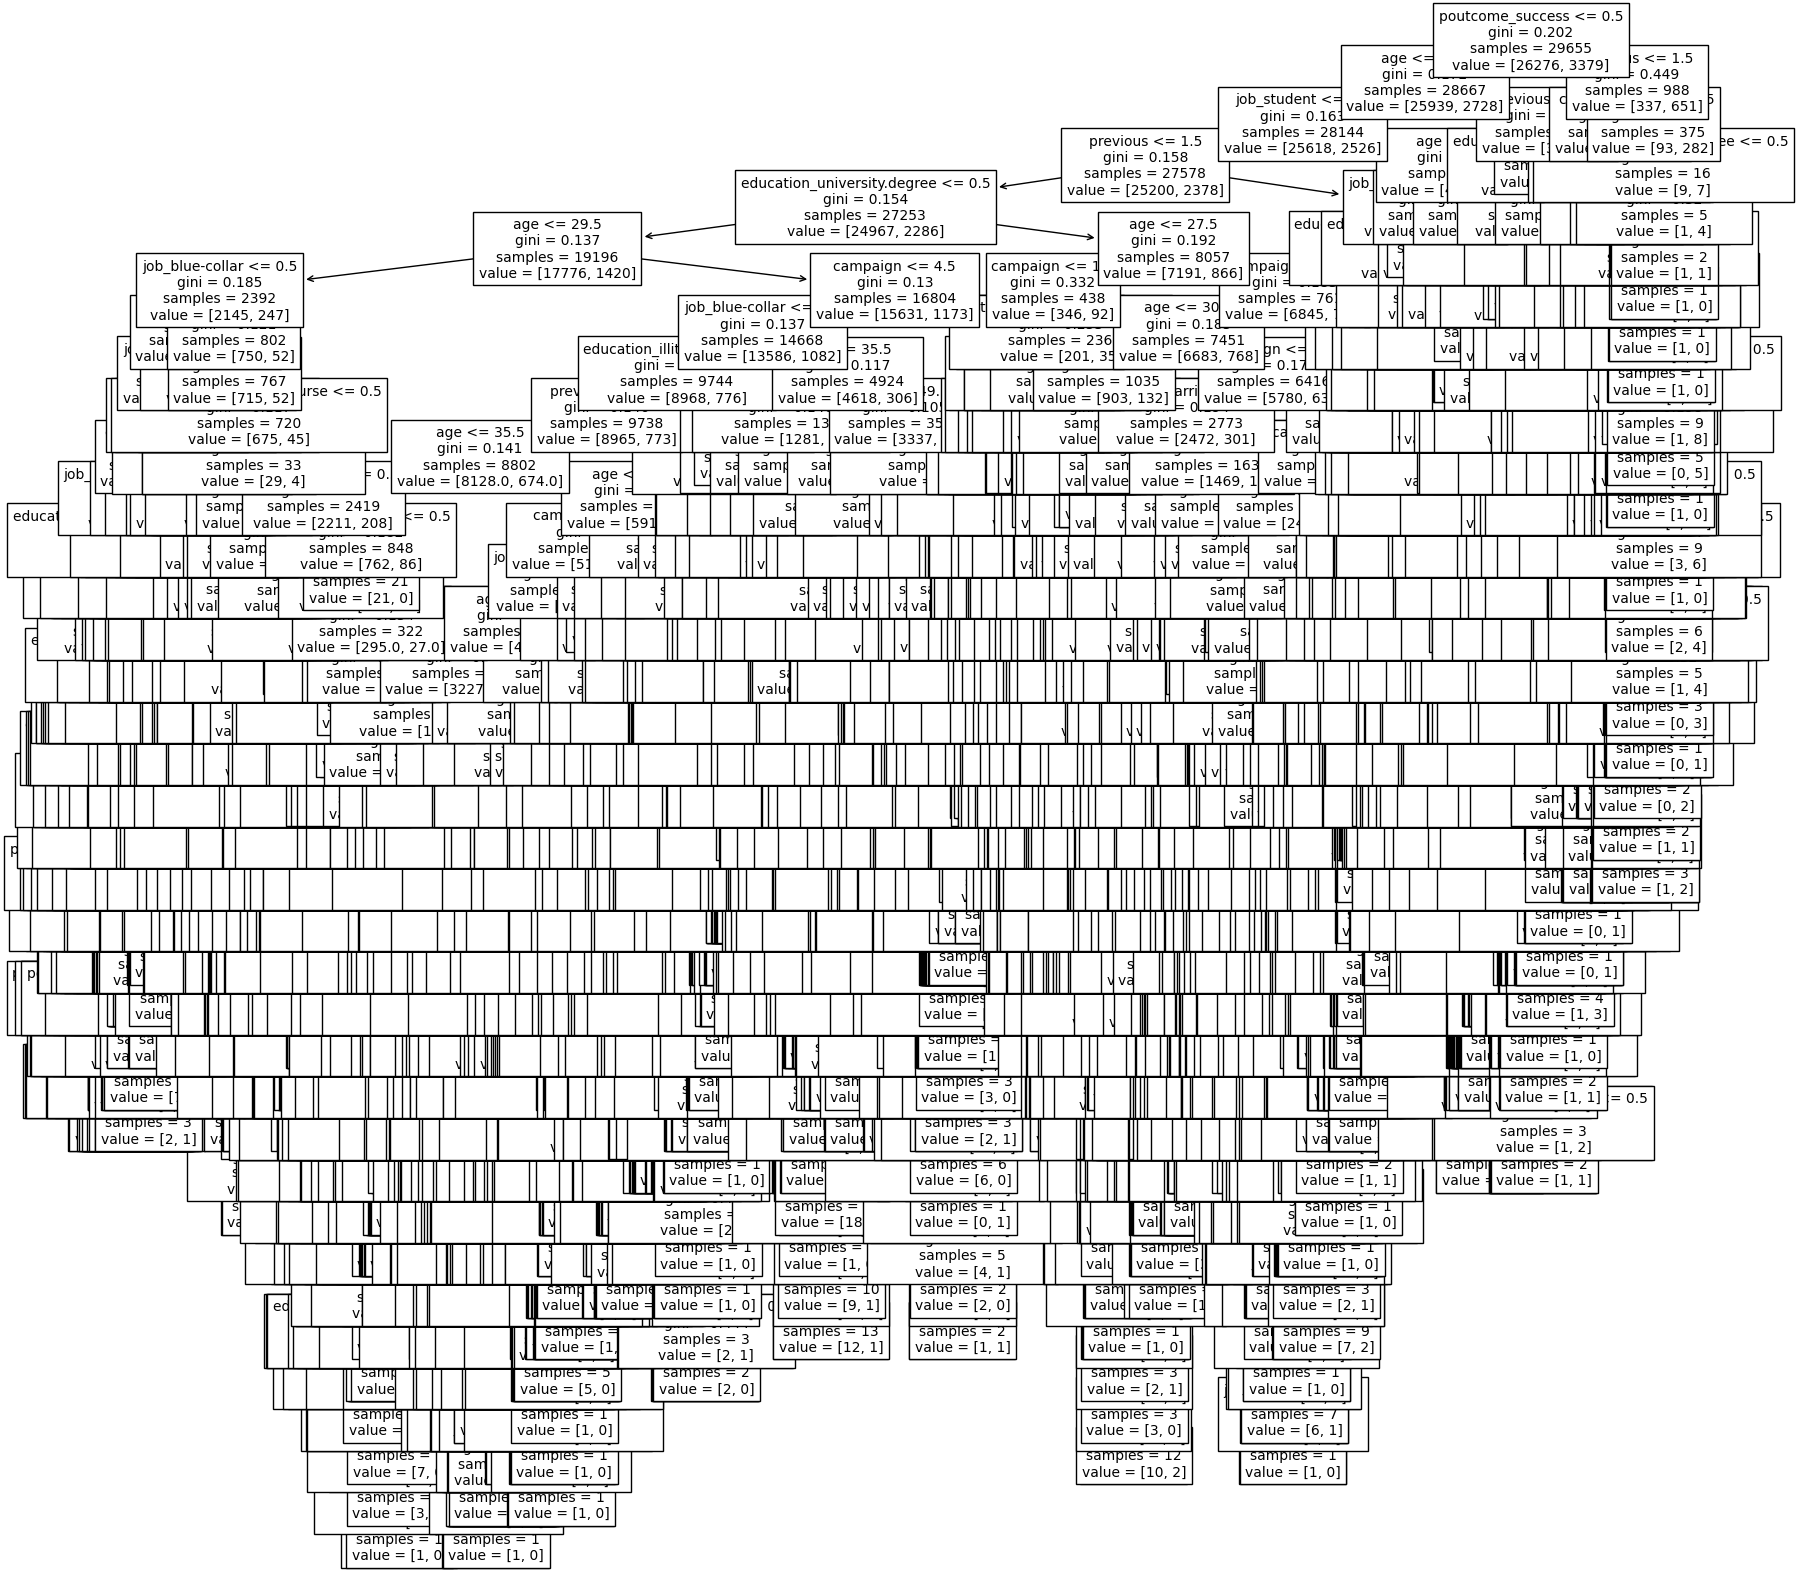

In [41]:
# Let's visualize the tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()

Do previous calls impact positive responses?

In [33]:
campaign["yes_percent"] = campaign["y"].map({"yes": 1, "no": 0})


In [34]:
campaign_previous = campaign[
    campaign.groupby("previous")["previous"].transform("count") > 30
]


In [35]:
response_rate= (campaign_previous.groupby("previous")["yes_percent"].mean().reset_index())
campaign["previous"].value_counts()

,count
previous,
0,31988
1,4116
2,684
3,196
4,64
5,15
6,5
7,1


<Axes: xlabel='previous', ylabel='yes_percent'>

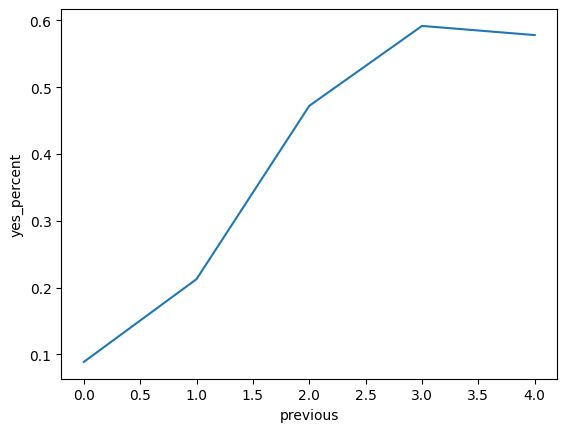

In [37]:
sns.lineplot (data= response_rate, x = "previous", y = "yes_percent")